#### Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from mlflow.models import infer_signature
from urllib.parse import urlparse
from warnings import filterwarnings
filterwarnings('ignore')

### Column Info


- **Gender**: Gender of the passengers (Female, Male)
- **Customer Type**: The customer type (Loyal customer, disloyal customer)
- **Age**: The actual age of the passengers
- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- **Flight Distance**: The flight distance of this journey
- **Inflight Wifi Service**: Satisfaction level of the inflight wifi service (0: Not Applicable; 1–5)
- **Departure/Arrival Time Convenient**: Satisfaction level of Departure/Arrival time convenient
- **Ease of Online Booking**: Satisfaction level of online booking
- **Gate Location**: Satisfaction level of Gate location
- **Food and Drink**: Satisfaction level of Food and drink
- **Online Boarding**: Satisfaction level of online boarding
- **Seat Comfort**: Satisfaction level of Seat comfort
- **Inflight Entertainment**: Satisfaction level of inflight entertainment
- **On-board Service**: Satisfaction level of On-board service
- **Leg Room Service**: Satisfaction level of Leg room service
- **Baggage Handling**: Satisfaction level of baggage handling
- **Check-in Service**: Satisfaction level of check-in service
- **Inflight Service**: Satisfaction level of inflight service
- **Cleanliness**: Satisfaction level of cleanliness
- **Departure Delay in Minutes**: Minutes delayed when departure
- **Arrival Delay in Minutes**: Minutes delayed when arrival
- **Satisfaction**: Airline satisfaction level (Satisfaction, Neutral or Dissatisfaction)


In [2]:
df = pd.read_csv('data/raw/data.csv')

In [3]:
df.shape

(129880, 23)

In [4]:
# Percentage Count
val = df['satisfaction'].value_counts()

# Printing the percentage count
print(f"Percentage of satisfied passengers: {val[1] / (val[0] + val[1]) * 100:.2f}%")
print(f"Percentage of dissatisfied passengers: {val[0] / (val[0] + val[1]) * 100:.2f}%")


Percentage of satisfied passengers: 43.45%
Percentage of dissatisfied passengers: 56.55%


In [5]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

#### Observation :
1. `Arrival Delay in Minutes` column  has 393 missing values.
2. Data doesn't have any duplicate columns

I have decided to drop missing value columns because they are few in number.

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
df.shape

(129487, 23)

In [11]:
col_name = df.columns.tolist()

In [12]:
for i in col_name:
    print(f"{i} --> {df[i].dtype}")

Gender --> object
Customer Type --> object
Age --> int64
Type of Travel --> object
Class --> object
Flight Distance --> int64
Inflight wifi service --> int64
Departure/Arrival time convenient --> int64
Ease of Online booking --> int64
Gate location --> int64
Food and drink --> int64
Online boarding --> int64
Seat comfort --> int64
Inflight entertainment --> int64
On-board service --> int64
Leg room service --> int64
Baggage handling --> int64
Checkin service --> int64
Inflight service --> int64
Cleanliness --> int64
Departure Delay in Minutes --> int64
Arrival Delay in Minutes --> float64
satisfaction --> object


In [13]:
df.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3821
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            464
Arrival Delay in Minutes              472
satisfaction                            2
dtype: int64

## Note : Since most of the columns are categorical but still they are of type int and hence we need to typecast them as categorical.

In [14]:
num_col = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

In [15]:
cat_col = []
for i in col_name:
    if i not in num_col:
        cat_col.append(i)

In [16]:
# Percentage Count
val = df['satisfaction'].value_counts()

# Printing the percentage count
print(f"Percentage of satisfied passengers: {val[1] / (val[0] + val[1]) * 100:.2f}%")
print(f"Percentage of dissatisfied passengers: {val[0] / (val[0] + val[1]) * 100:.2f}%")


Percentage of satisfied passengers: 43.45%
Percentage of dissatisfied passengers: 56.55%


In [17]:
cat_col

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'satisfaction']

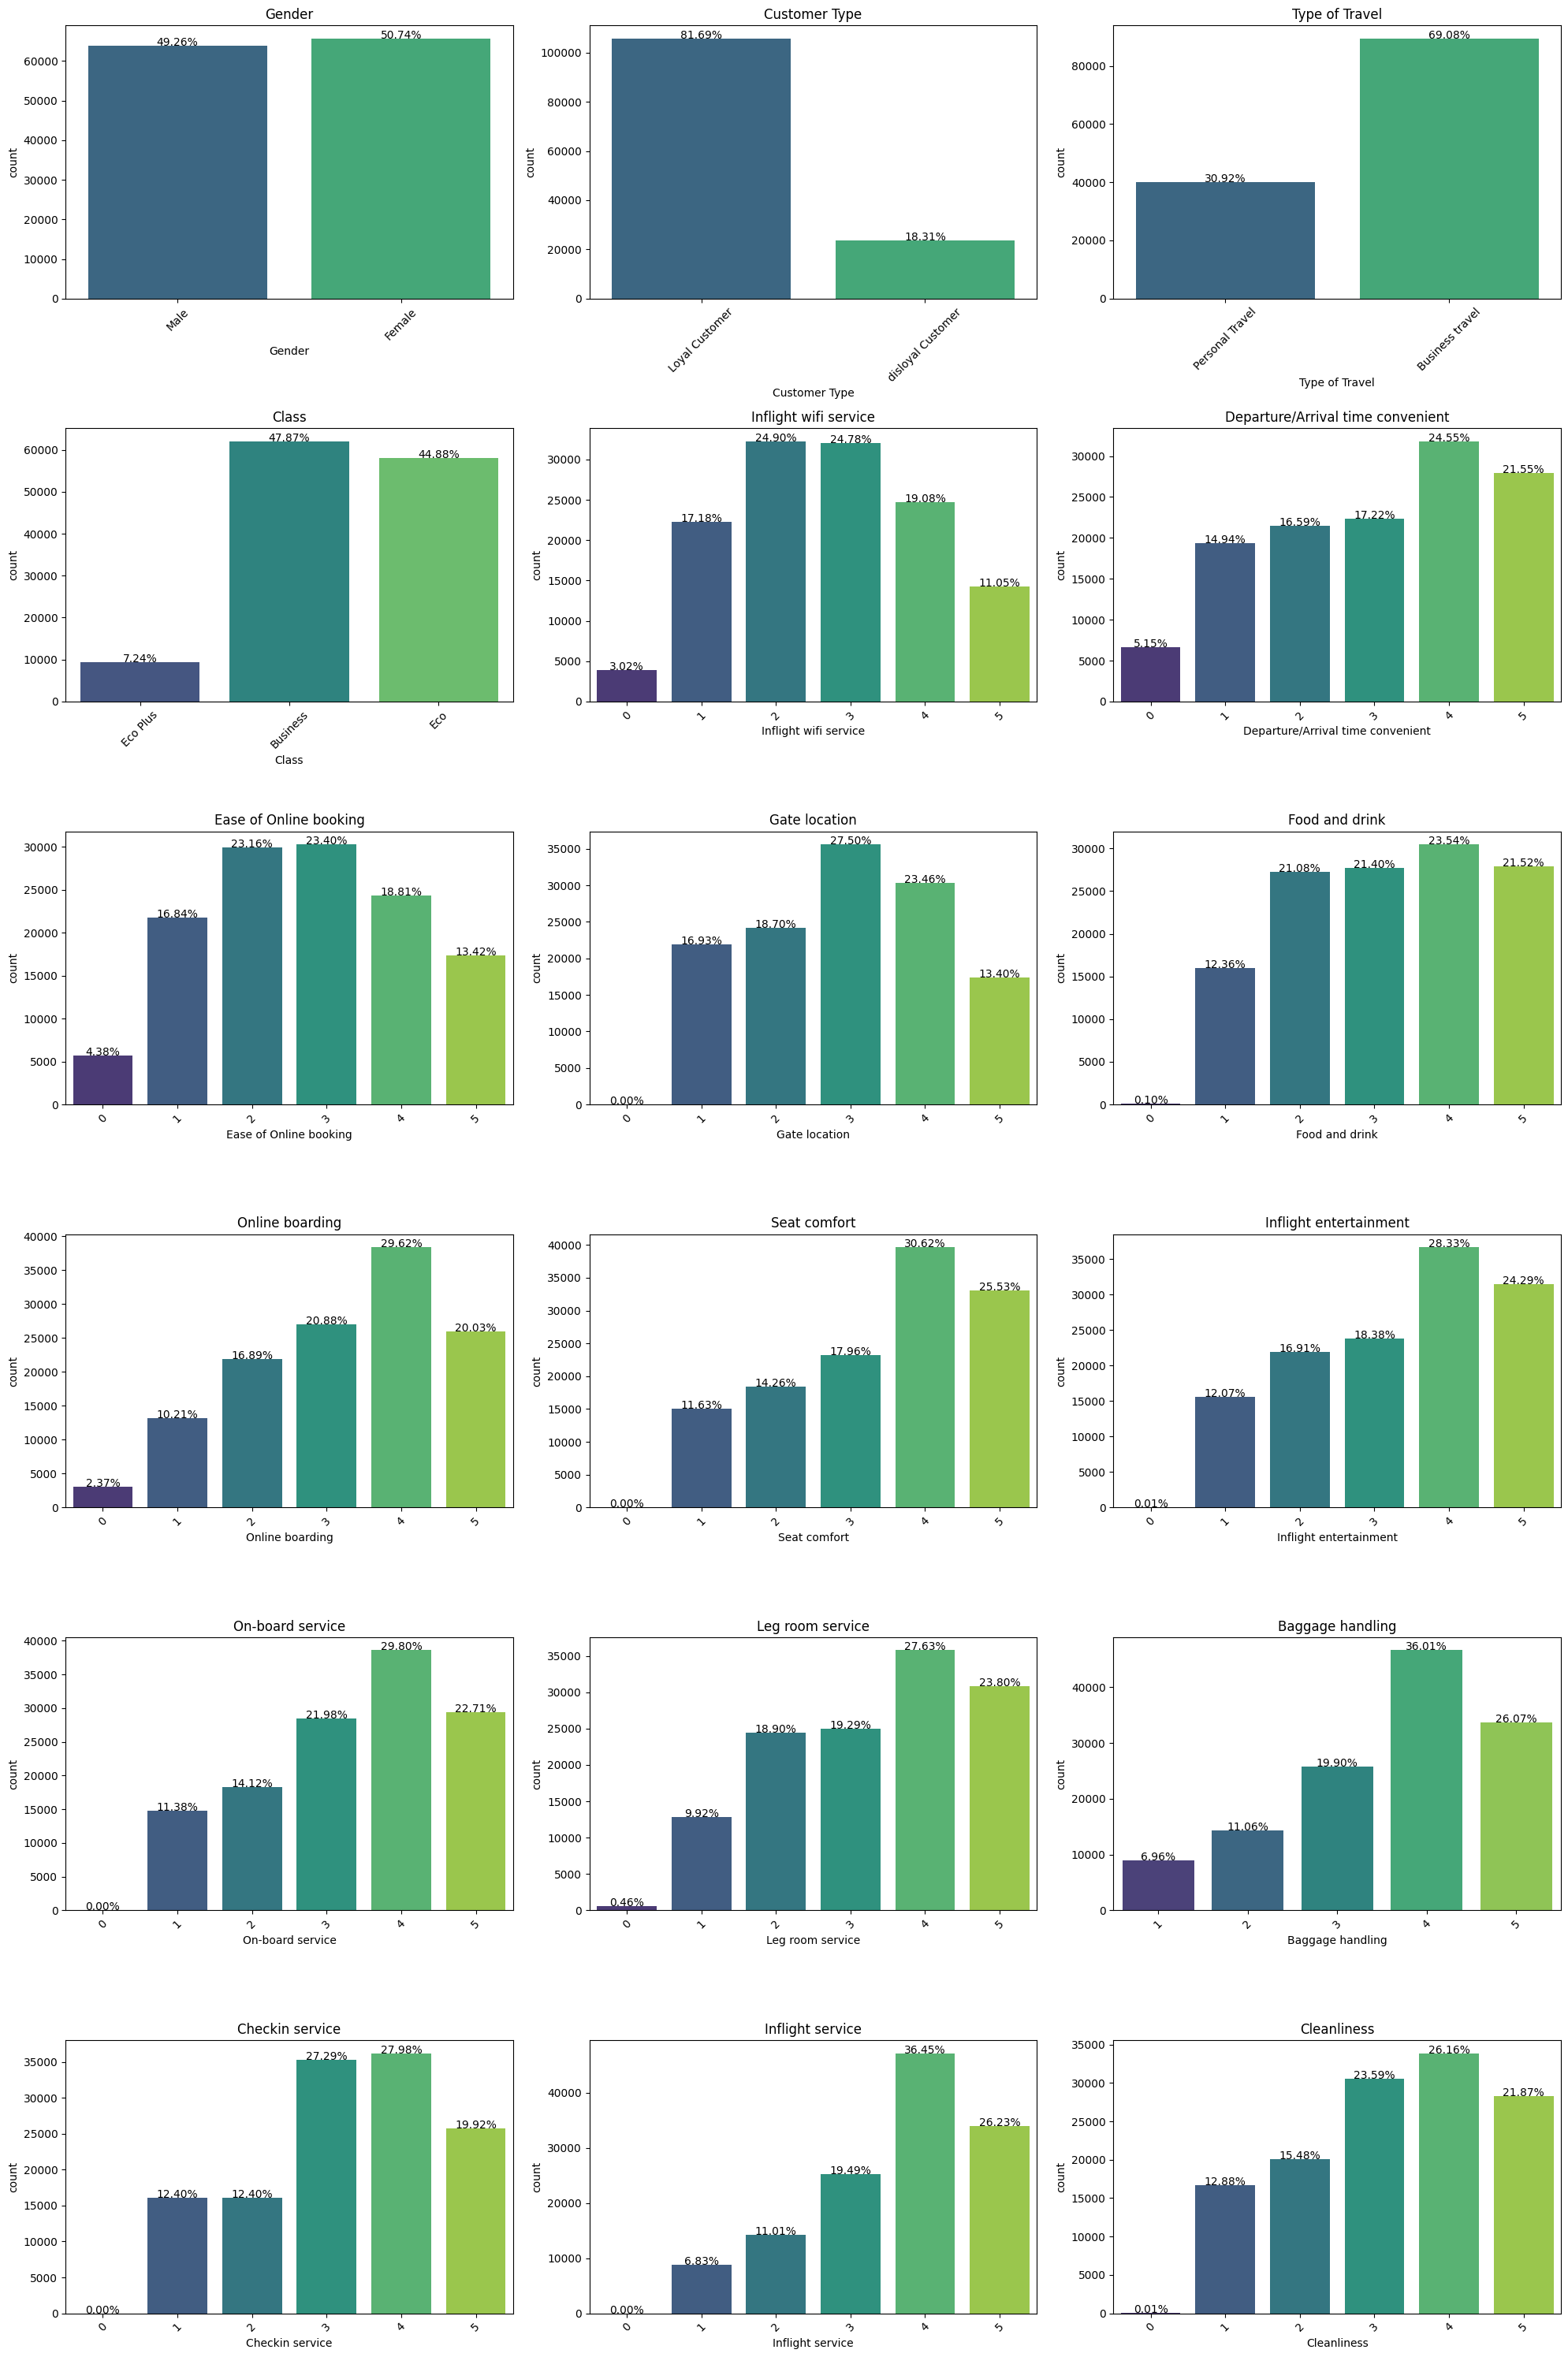

In [18]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

n = len(cat_col) - 1  # Exclude 'satisfaction'
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows * 5))
axes = axes.flatten()

plot_idx = 0  # To track subplot index

for col in cat_col:
    if col == 'satisfaction':
        continue

    ax = axes[plot_idx]
    sns.countplot(data=df, x=col, ax=ax, palette='viridis')
    ax.set_title(f'{col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # ➕ Add percentage labels on top of bars
    total = len(df[col].dropna())  # Total count for this column (excluding NaNs)

    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{percentage:.2f}%', ha="center", fontsize=10)

    plot_idx += 1

# 🧹 Hide unused axes
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("cat_col_countplot.png")
plt.show()


#### Observations :
1. Male and Female customers proportions are almost equal.
2. Loyal customers are 80%.
3. Business purpose Travellers are 70%.
4. Business class customers are nearly 48% followed by Eco class 44% and Eco Plus 7%.

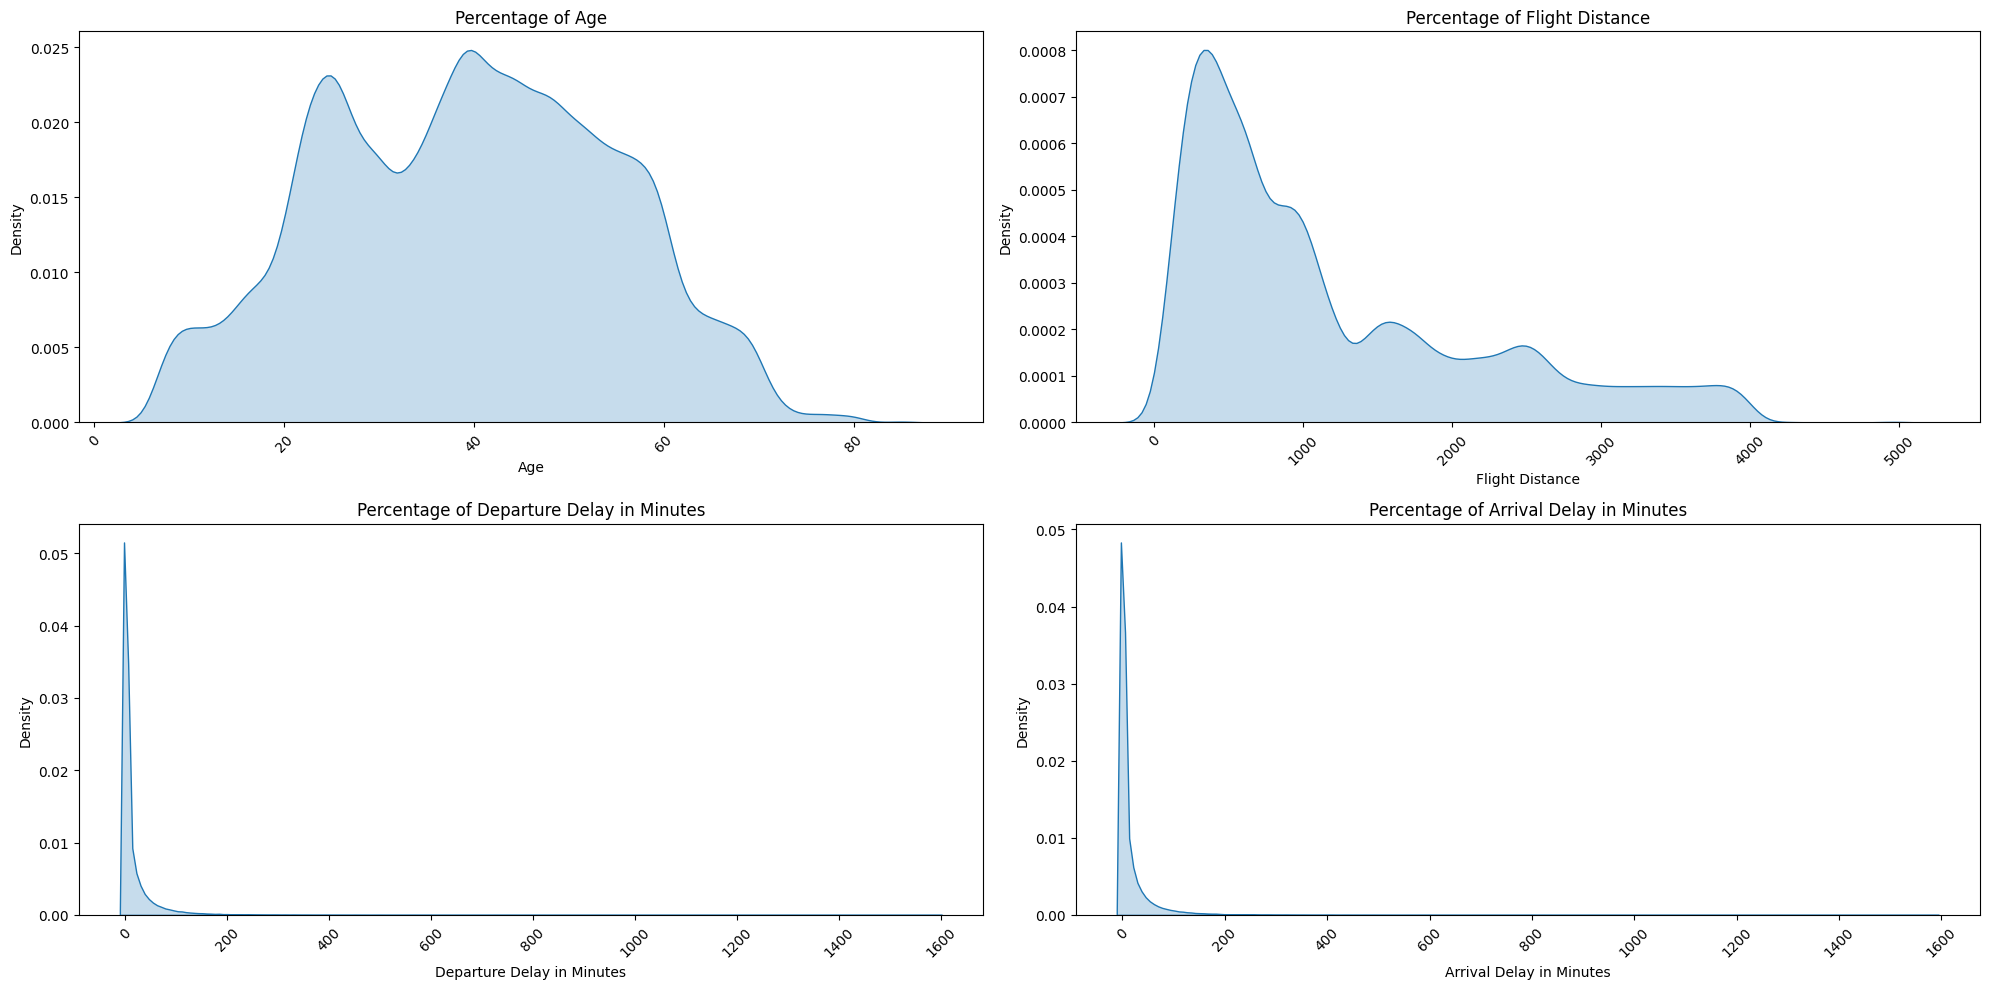

In [19]:
n = len(num_col) 
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows * 5))
axes = axes.flatten()

plot_idx = 0  # To track subplot index

for col in num_col:
    ax = axes[plot_idx]
    # if(col in ['Departure Delay in Minutes','Arrival Delay in Minutes']) :
    #     sns.histplot(data=df, x=col, ax=ax,log_scale=True)
    # else : 
    #     sns.histplot(data=df, x=col, ax=ax,kde=True)    
    sns.kdeplot(data=df, x=col, ax=ax,fill=True)
    ax.set_title(f'Percentage of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plot_idx += 1

# 🧹 Hide unused axes
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("num_col_kdeplot.png")
plt.show()


### Plotting Correlation HeatMap

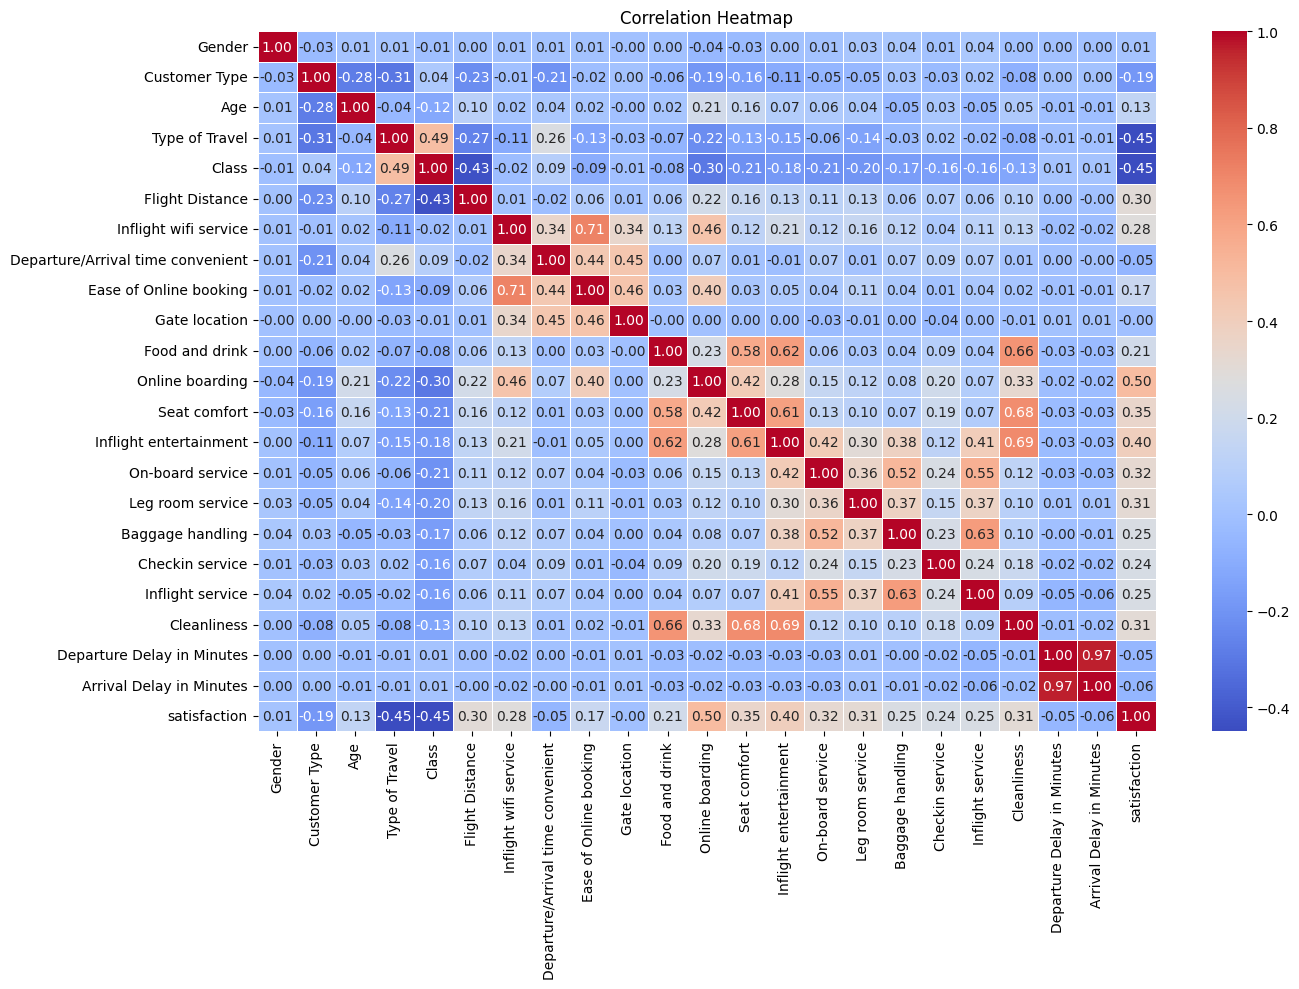

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df_1 = df.copy()
label_encoders = {}

for col in df_1.select_dtypes(include=['object']):
    le = LabelEncoder()
    df_1[col] = le.fit_transform(df_1[col])

# Compute correlation matrix
corr_matrix = df_1.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


### Observations :
1. Dropping `Gender`, `Gate Location`, `Departure/Arrival time convenient` as they have ~0 affect on satisfaction.

2. `Age` also has very less effect but considering it because airlines often segment customers by age for targeted services.

3. Dropping `Departure Delay in minutes` because it is strongly correlated with `Arrival Delay in minutes` colummn (it is pretty obivous) and since it affects slightly more i.e -0.01 to satisfaction.